## Working with Datetime Variables in pandas

In [1]:
import pandas as pd

accidents = pd.read_csv('../data/Traffic_Accidents__2019_.csv')
accidents.head(2)

,Accident Number,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Reporting Officer,Collision Type Code,Collision Type Description,...,Harmful Code Description,Street Address,City,State,ZIP,RPA,Precinct,Latitude,Longitude,Mapped Location
0,20190038972,01/15/2019 07:40:00 PM,2,0,0,NaN,N,256374.0,4.0,ANGLE,...,MOTOR VEHICLE IN TRANSPORT,BELL RD & CEDAR POINTE PKWY,ANTIOCH,TN,37013.0,8753.0,SOUTH,36.0449,-86.6671,POINT (-86.6671 36.0449)
1,20190045402,01/17/2019 11:09:00 PM,2,0,0,NaN,Y,405424.0,11.0,Front to Rear,...,PARKED MOTOR VEHICLE,3248 PERCY PRIEST DR,NASHVILLE,TN,37214.0,8955.0,HERMIT,36.1531,-86.6291,POINT (-86.6291 36.1531)


Recall that we can get more information about the columns by using the `.info()` method.

In [2]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34692 entries, 0 to 34691
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Accident Number             34692 non-null  int64  
 1   Date and Time               34692 non-null  object 
 2   Number of Motor Vehicles    34692 non-null  int64  
 3   Number of Injuries          34692 non-null  int64  
 4   Number of Fatalities        34692 non-null  int64  
 5   Property Damage             2495 non-null   object 
 6   Hit and Run                 34691 non-null  object 
 7   Reporting Officer           34684 non-null  float64
 8   Collision Type Code         34688 non-null  float64
 9   Collision Type Description  34688 non-null  object 
 10  Weather Code                34641 non-null  float64
 11  Weather Description         34641 non-null  object 
 12  Illumination Code           34665 non-null  float64
 13  Illumination Description    346

From this, we can see that the `Date and Time` column is an object, which basically means that it is being treated as text. This is not very convenient if we want to work with the data in this column.

To be able to make better use of this column, we probably want to convert it to a datetime type, which can be done using the [`to_datetime` function](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html). Datetime columns let us extract components (month, weekday, hour), filter by date, compute time differences, and use time-based rolling windows.

When using this function, we can let it infer the format or we can specify it, which will speed up processing. We need to specify the format using the appropriate [format codes](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes).

In [3]:
# Example date and time value: 01/15/2019 07:40:00 PM

accidents['Date and Time'] = pd.to_datetime(accidents['Date and Time'],
                                           format = "%m/%d/%Y %I:%M:%S %p")

Afterwards, we can verify that we have a datetime type.

In [4]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34692 entries, 0 to 34691
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Accident Number             34692 non-null  int64         
 1   Date and Time               34692 non-null  datetime64[ns]
 2   Number of Motor Vehicles    34692 non-null  int64         
 3   Number of Injuries          34692 non-null  int64         
 4   Number of Fatalities        34692 non-null  int64         
 5   Property Damage             2495 non-null   object        
 6   Hit and Run                 34691 non-null  object        
 7   Reporting Officer           34684 non-null  float64       
 8   Collision Type Code         34688 non-null  float64       
 9   Collision Type Description  34688 non-null  object        
 10  Weather Code                34641 non-null  float64       
 11  Weather Description         34641 non-null  object    

Once we have converted, we can extract individual parts of the date and time, using [pandas datetime functionality](https://pandas.pydata.org/docs/user_guide/timeseries.html).

When using this functionality, you need to start with `.dt` to indicate to pandas that we want to use the datetime functionality.

For example, let's say we want to extract the month into a new column.

In [5]:
accidents['month'] = accidents['Date and Time'].dt.month
accidents.head()

,Accident Number,Date and Time,Number of Motor Vehicles,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Reporting Officer,Collision Type Code,Collision Type Description,...,Street Address,City,State,ZIP,RPA,Precinct,Latitude,Longitude,Mapped Location,month
0,20190038972,2019-01-15 19:40:00,2,0,0,NaN,N,256374.0,4.0,ANGLE,...,BELL RD & CEDAR POINTE PKWY,ANTIOCH,TN,37013.0,8753.0,SOUTH,36.0449,-86.6671,POINT (-86.6671 36.0449),1
1,20190045402,2019-01-17 23:09:00,2,0,0,NaN,Y,405424.0,11.0,Front to Rear,...,3248 PERCY PRIEST DR,NASHVILLE,TN,37214.0,8955.0,HERMIT,36.1531,-86.6291,POINT (-86.6291 36.1531),1
2,20190051468,2019-01-20 12:57:00,2,0,0,NaN,N,834798.0,6.0,SIDESWIPE - OPPOSITE DIRECTION,...,700 THOMPSON LN,NASHVILLE,TN,37204.0,8305.0,MIDTOW,36.1122,-86.7625,POINT (-86.7625 36.1122),1
3,20190088097,2019-02-02 00:38:00,2,0,0,NaN,Y,660929.0,4.0,ANGLE,...,400 RADNO,NASHVILLE,TN,NaN,NaN,NaN,36.0483,-86.4369,POINT (-86.4369 36.0483),2
4,20190091289,2019-02-03 13:25:00,2,0,0,NaN,N,212369.0,4.0,ANGLE,...,ELLINGTON AG CENTER PVTDR & EDMONDSON PK,NASHVILLE,TN,37220.0,8615.0,MIDTOW,36.0618,-86.7405,POINT (-86.7405 36.0618),2


Now we can use this to answer, for example, what is the maximum number of cars involved in a single accident in July?

In [6]:
accidents[accidents['month'] == 7]['Number of Motor Vehicles'].max()

8

There are [many different components](https://pandas.pydata.org/docs/user_guide/timeseries.html#time-date-components) we can extract.

In [7]:
accidents['Date and Time'].dt.time.head()

0    19:40:00
1    23:09:00
2    12:57:00
3    00:38:00
4    13:25:00
Name: Date and Time, dtype: object

In [8]:
accidents['Date and Time'].dt.date.head()

0    2019-01-15
1    2019-01-17
2    2019-01-20
3    2019-02-02
4    2019-02-03
Name: Date and Time, dtype: object

In [9]:
accidents['Date and Time'].dt.weekday.head()

0    1
1    3
2    6
3    5
4    6
Name: Date and Time, dtype: int32

In [10]:
accidents['Date and Time'].dt.is_leap_year.head()

0    False
1    False
2    False
3    False
4    False
Name: Date and Time, dtype: bool

You can use comparison symbols with datetime columns, too. 

For example, if we want to find out how many accidents happened before March 3.

In [11]:
(accidents['Date and Time'] < '03/03/2019').sum()

np.int64(5558)

You can also perform calculations on datetime columns.

For example, let's say we want to find the amount of time between each accident and the first accident in the dataset.

In [12]:
accidents['Date and Time'] - accidents.loc[0, 'Date and Time']

0         0 days 00:00:00
1         2 days 03:29:00
2         4 days 17:17:00
3        17 days 04:58:00
4        18 days 17:45:00
               ...       
34687   211 days 20:35:00
34688   280 days 04:25:00
34689   279 days 14:05:00
34690   231 days 12:15:00
34691   266 days 00:15:00
Name: Date and Time, Length: 34692, dtype: timedelta64[ns]

Notice that this is a [timedelta](https://pandas.pydata.org/docs/user_guide/timedeltas.html), which represents a difference in times.

Let's say we want to look at the number of accidents over time.

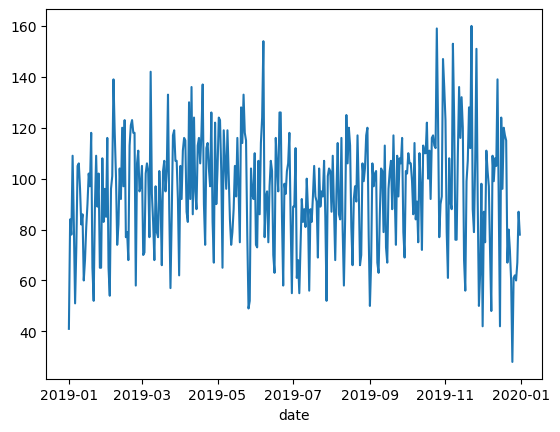

In [13]:
accidents['date'] = accidents['Date and Time'].dt.date
accidents.groupby('date').size().plot();

We end up with something that has a lot of variability but doesn't necessarily allow up to see longer-term trends. Instead perhaps we can look at a moving average.

In [14]:
accidents_per_day = accidents.groupby('date').size().reset_index()
accidents_per_day.columns = ['date', 'num_accidents']
accidents_per_day['date'] = pd.to_datetime(accidents_per_day['date'])
accidents_per_day.head()

,date,num_accidents
0,2019-01-01,41
1,2019-01-02,84
2,2019-01-03,78
3,2019-01-04,109
4,2019-01-05,82


Rolling windows work best when your data is sorted by date. Let's make sure that our data is sorted.

In [15]:
accidents_per_day = accidents_per_day.sort_values('date')

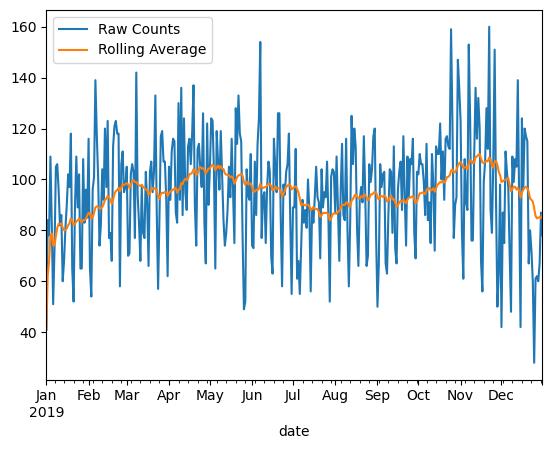

In [16]:
accidents_per_day['rolling_30D'] = accidents_per_day.rolling(window = '30D', on='date')['num_accidents'].mean()
ax = accidents_per_day.plot(x='date', y='num_accidents', label= 'Raw Counts')
accidents_per_day.plot(x='date', y='rolling_30D', label= 'Rolling Average', ax=ax);